**Задание**

**Цель:** изучить применение дерева решений в рамках задачи регрессии

**Описание задания:**

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets.
Скачать датасет также можно по ссылке
Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

**Этапы работы:**

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.

a.Проверьте данные на пропуски. Удалите в случае обнаружения.

b.*Нормализуйте один из признаков.

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.
a. Сравните точность двух моделей.
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.

**1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).**


In [95]:
import pandas as pd
import numpy as np

In [96]:
#Загружаем датасет
housing = pd.read_csv('https://u.netology.ru/backend/uploads/lms/content_assets/file/8723/ch.csv')

In [97]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**2. Проведите первичный анализ.**

a.Проверьте данные на пропуски. Удалите в случае обнаружения.

b.*Нормализуйте один из признаков.


In [98]:
#Проверим данные на наличие пропусков
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [99]:
housing.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Пропуски не выявлены

In [100]:
#Нормализуем признак population
housing['Population'] = (housing['Population'] - housing['Population'].min()) / (housing['Population'].max()-housing['Population'].min())

In [101]:
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25,3.422


**3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.**


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = housing.loc[:, housing.columns != 'MedHouseVal'] #признаки
y = housing['MedHouseVal'] #целевая переменная

In [104]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**4. Обучите модель регрессии на обучающем множестве.**

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
model_lin_reg = LinearRegression()

In [108]:
model_lin_reg.fit(X_train, y_train)

LinearRegression()

**5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.**


In [111]:
model_lin_reg_train = model_lin_reg.score(X_train, y_train)
model_lin_reg_test = model_lin_reg.score(X_test, y_test)

print(f'Качество на обучающей выборке: {model_lin_reg_train:.2f}')
print(f'Качество на тестовой выборке: {model_lin_reg_test:.2f}')

Качество на обучающей выборке: 0.61
Качество на тестовой выборке: 0.58


**6. Обучите дерево решений на обучающем множестве.**

a. Повторите п. 5 для полученной модели.

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным.


In [112]:
from sklearn.tree import DecisionTreeRegressor

In [113]:
model_dec_tree = DecisionTreeRegressor(random_state=42)
model_dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [115]:
model_dec_tree_train = model_dec_tree.score(X_train, y_train)
model_dec_tree_test = model_dec_tree.score(X_test, y_test)

print(f'Качество на обучающей выборке: {model_dec_tree_train:.2f}')
print(f'Качество на тестовой выборке: {model_dec_tree_test:.2f}')

Качество на обучающей выборке: 1.00
Качество на тестовой выборке: 0.62


Модель показала идеальный вариант на обучающей выборке и не очень хороший - на тестовой, что свидетельствует о переобучении модели.

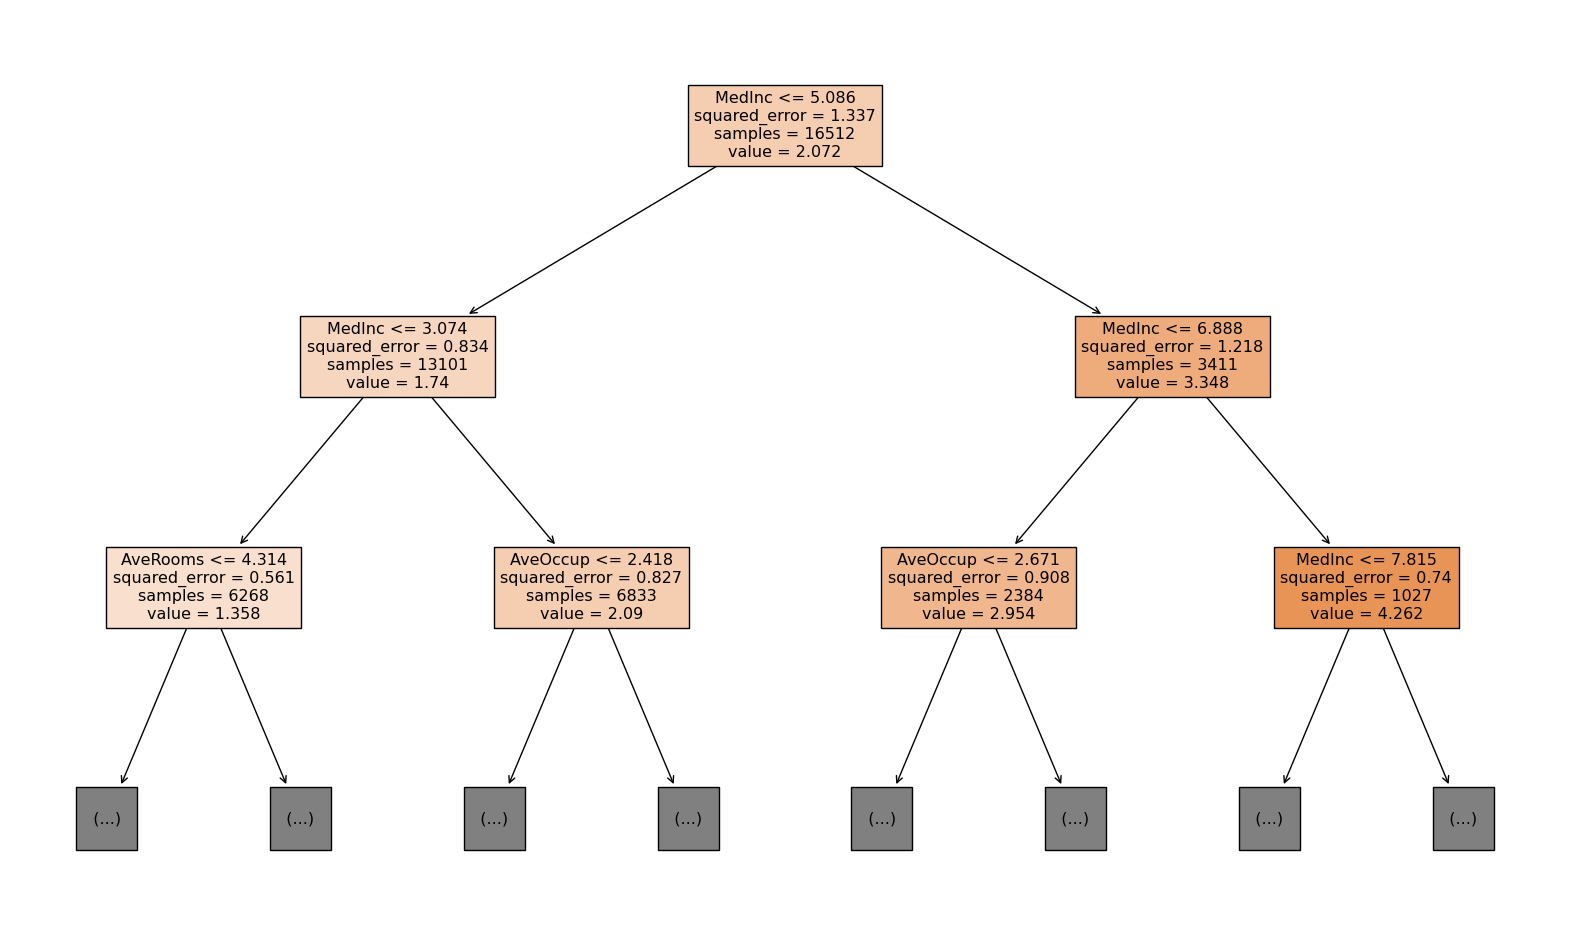

In [116]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(model_dec_tree, feature_names=X.columns, filled=True, max_depth=2);

#при увеличении max_depth дерево разрастается и перестает быть читабельным.

**7. Оптимизируйте глубину дерева (max_depth).**

*Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.


In [117]:
#Ограничим максимальную глубину дерева
model_dec_tree = DecisionTreeRegressor(random_state=42, max_depth=5)
model_dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [118]:
model_dec_tree_train = model_dec_tree.score(X_train, y_train)
model_dec_tree_test = model_dec_tree.score(X_test, y_test)

print(f'Качество на обучающей выборке: {model_dec_tree_train:.2f}')
print(f'Качество на тестовой выборке: {model_dec_tree_test:.2f}')

Качество на обучающей выборке: 0.64
Качество на тестовой выборке: 0.60


In [119]:
model_dec_tree = DecisionTreeRegressor(random_state=42, max_depth=7)
model_dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=42)

In [120]:
model_dec_tree_train = model_dec_tree.score(X_train, y_train)
model_dec_tree_test = model_dec_tree.score(X_test, y_test)

print(f'Качество на обучающей выборке: {model_dec_tree_train:.2f}')
print(f'Качество на тестовой выборке: {model_dec_tree_test:.2f}')

Качество на обучающей выборке: 0.72
Качество на тестовой выборке: 0.65


Увеличив максимальную глубину дерева до 7, мы улучшили качество модели на тестовой выборке с 0,62 од 0,65 и снизили степень переобученности модели.

In [121]:
#Введем ограничение на минимальное количество объектов в одном листе
model_dec_tree = DecisionTreeRegressor(random_state=42, max_depth=7, min_samples_leaf=400)
model_dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=400, random_state=42)

In [122]:
model_dec_tree_train = model_dec_tree.score(X_train, y_train)
model_dec_tree_test = model_dec_tree.score(X_test, y_test)

print(f'Качество на обучающей выборке: {model_dec_tree_train:.2f}')
print(f'Качество на тестовой выборке: {model_dec_tree_test:.2f}')

Качество на обучающей выборке: 0.63
Качество на тестовой выборке: 0.60


In [123]:
model_dec_tree = DecisionTreeRegressor(random_state=42, max_depth=7, min_samples_leaf=150)
model_dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=150, random_state=42)

In [124]:
model_dec_tree_train = model_dec_tree.score(X_train, y_train)
model_dec_tree_test = model_dec_tree.score(X_test, y_test)

print(f'Качество на обучающей выборке: {model_dec_tree_train:.2f}')
print(f'Качество на тестовой выборке: {model_dec_tree_test:.2f}')

Качество на обучающей выборке: 0.68
Качество на тестовой выборке: 0.63


Добавив еще один критерий остановы (min_samples_leaf) мы снизили степень переобученности модели, но качество модели на тестовой выборке стало чуть хуже.

**8. Сформулируйте выводы по проделанной работе.**

**a. Сравните точность двух моделей.**

Модель на основе decision_tree показала более лучший результат, чем модель на основе линейной регрессии.

Вместе с тем модель на основе decision_tree требуется дополнительно настраивать с помощью критериев остановы (например, max_depth, min_samples_leaf, max_leaf_nodes), чтобы снизить степень ее переобученности. Благодаря таким действиям модель станет более общей (более применимой с практической точки зрения) при использовании новых данных.

При этом введение ограничений (например, max_depth = 7 в нашем случае) может не только снизить степень переобученности модели, но и улучшить метрику качества модели (в нашем случае с 0,62 до 0,65 на тестовых выборках).

**b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?**

- Модель линейной регресии предпочтительней использовать с ограниченным количеством признаков для выявления трендов (особенно, когда признаки имеют линейную связь).

  Такая модель не склонна переобучаться, показывает стабильные результаты, если разброс в данных не является большим.

- Модель на основе дерева решений может быть более точной по сравнению с линейной регрессией, поскольку может подстраиваться (находить более тесные связи между признаками) под бОльшее количество объектов (даже под каждый из объектов).
  
  В связи с этим такая модель склонна переобучаться и может быть слишком сложной. Чтобы избежать данной проблемы и сделать модель применимой и для новых данных, при построении модели используют комбинацию критериев остановы.

